In [2]:
from data import MNQ, MES, CL, GC, ZC, ZB

In [3]:
import warnings

warnings.filterwarnings("ignore")

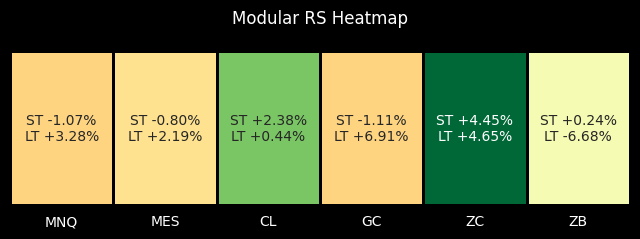

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

combined_df = pd.DataFrame({
    "MNQ": MNQ['Close'],
    "MES": MES['Close'],
    "CL": CL['Close'],
    "GC": GC['Close'],
    "ZC": ZC['Close'],
    "ZB": ZB['Close']
})

tickers_data = {
    "MNQ": MNQ['Close'],
    "MES": MES['Close'],
    "CL": CL['Close'],
    "GC": GC['Close'],
    "ZC": ZC['Close'],
    "ZB": ZB['Close']
}

short_term_days = 1 * 288
long_term_days = 30 * 288

data = {}
for ticker, prices in tickers_data.items():
    prices = prices.dropna()
    st_change = (prices[-1] - prices[-short_term_days-1]) / prices[-short_term_days-1] * 100
    lt_change = (prices[-1] - prices[-long_term_days-1]) / prices[-long_term_days-1] * 100
    data[ticker] = {"ST": st_change, "LT": lt_change}

df = pd.DataFrame(data)

def create_annotation(value):
    return f"ST {'+' if value['ST'] > 0 else ''}{value['ST']:.2f}%\nLT {'+' if value['LT'] > 0 else ''}{value['LT']:.2f}%"

annotations = df.apply(create_annotation, axis=0).values.reshape(1, df.shape[1])

# Use only ST values for color-coding
st_values = df.loc['ST'].values.reshape(1, -1)

fig, ax = plt.subplots(figsize=(8, 2))
plt.gcf().set_facecolor('black')

sns.heatmap(
    st_values,
    annot=annotations,
    fmt='',
    cmap='RdYlGn',
    center=0,
    cbar=False,
    linewidths=1,
    linecolor='black',
    xticklabels=df.columns,
    ax=ax
)

ax.set_xticklabels(df.columns, rotation=0, color="white")
ax.set_yticklabels([''], color="white", rotation=0)
ax.tick_params(left=False, bottom=False)
plt.title("Modular RS Heatmap", color="white", pad=20)

plt.show()
